In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import load_iris

In [5]:
iris_df = load_iris()

In [7]:
print(iris_df.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [41]:
x=pd.DataFrame(iris_df.data)

In [43]:
x.columns=['Sepal_Length','Sepal_width','Petal_Length','Petal_width']
x

,Sepal_Length,Sepal_width,Petal_Length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [44]:
y=pd.DataFrame(iris_df.target)

In [45]:
y.columns=['Targets']
y

,Targets
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


# Analyse the Data Visually before training

Text(0.5, 1.0, 'Cluster Spread')

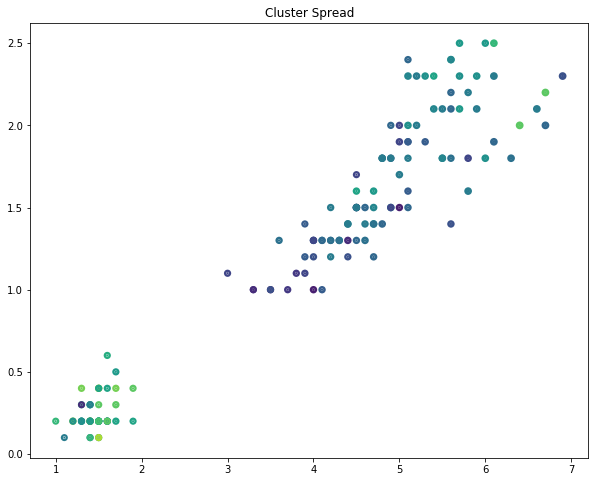

In [76]:
plt.figure(figsize=(10,8))
plt.scatter(x.Petal_Length, x.Petal_width,x.Sepal_Length,x.Sepal_width,linewidths=5)
plt.title("Cluster Spread")

Text(0.5, 1.0, 'Cluster Spread')

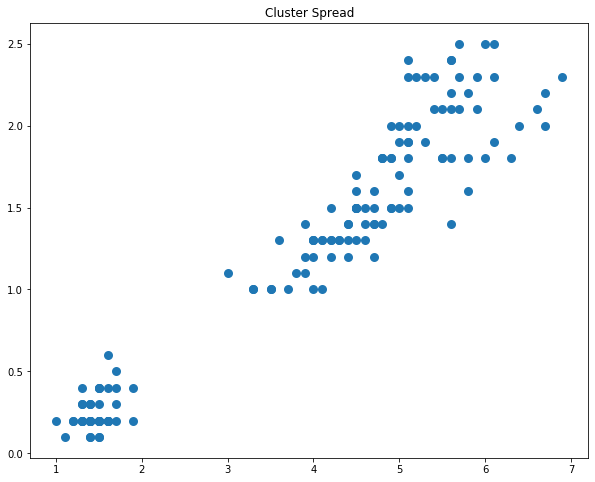

In [79]:
#clusters of flowers using petal width and length

plt.figure(figsize=(10,8))
plt.scatter(x.Petal_Length, x.Petal_width,linewidths=3)
plt.title("Cluster Spread")

# Drop other two features for simplicity.

In [58]:
x.drop(['Sepal_Length','Sepal_width'],axis =1)

,Petal_Length,Petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


Text(0.5, 1.0, 'Cluster Spread')

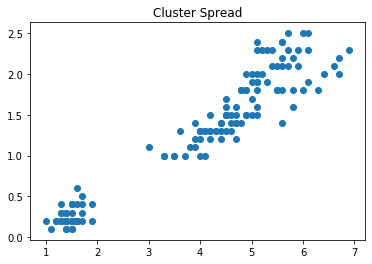

# Use K Mean Clustering


In [59]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)

In [60]:
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [80]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

# Data Visually by comparing before and after the training.

Text(0.5, 1.0, 'Cluster Before ')

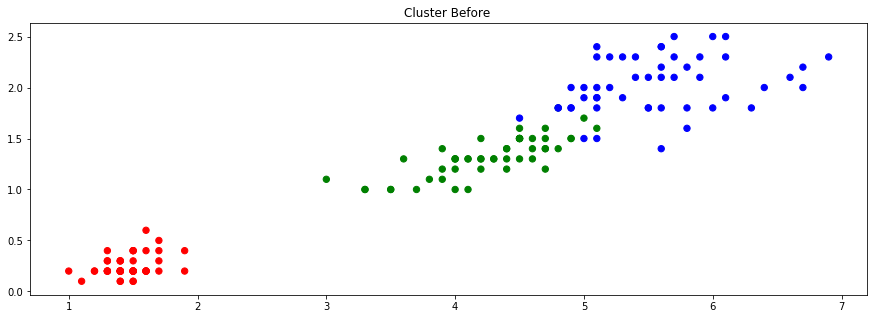

In [82]:
#Before
plt.figure(figsize=(15,5))
colormap=np.array(['Red','green','blue'])
plt.scatter(x.Petal_Length, x.Petal_width,c=colormap[y.Targets],s=40)
plt.title('Cluster Before ')

Text(0.5, 1.0, 'Classification K-means ')

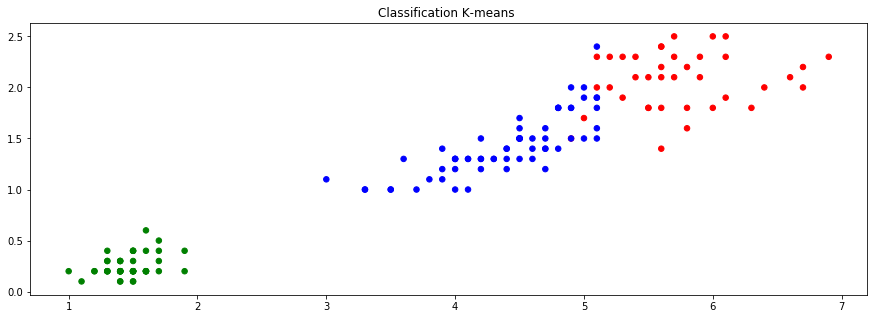

In [83]:
plt.figure(figsize=(15,5))
plt.scatter(x.Petal_Length, x.Petal_width,c=colormap[model.labels_],s=30)
plt.title('Classification K-means ')